<a href="https://colab.research.google.com/github/gyuseonge-chae/bigdata-machinelearning/blob/main/KRDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_08kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs08_all_v01/chs08_all_v01.sas7bdat', format='sas7bdat')
#df_09kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs09_all/chs09_all.sas7bdat', format='sas7bdat')
#df_10kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs10_all/chs10_all_v2.sas7bdat', format='sas7bdat')
#df_11kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs11_all/chs11_all.sas7bdat', format='sas7bdat')
#df_12kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs12_all/chs12_all.sas7bdat', format='sas7bdat')
#df_13kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs13_all (1)/chs13_all.sas7bdat', format='sas7bdat')

In [ ]:
df8= df_08kr[['age', 'sex', 'fma_12z1', 'fma_20z1', 'qoa_01z1', 'sma_02z1', 'sma_03z1', 'smd_02z1', 'sob_01z1','soa_01z1']]

df8.isnull().sum()

age            0
sex            0
fma_12z1    6754
fma_20z1    6912
qoa_01z1     111
sma_02z1     456
sma_03z1     161
smd_02z1     227
sob_01z1      71
soa_01z1      58
dtype: int64

In [ ]:
df8.dropna(inplace=True)
df8.isnull().sum()

<ipython-input-25-a7c7ad89263e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.dropna(inplace=True)


age         0
sex         0
fma_12z1    0
fma_20z1    0
qoa_01z1    0
sma_02z1    0
sma_03z1    0
smd_02z1    0
sob_01z1    0
soa_01z1    0
dtype: int64

In [ ]:
# 소득 수준

# 응답 거부류 삭제
index = df8[(df8['fma_12z1'] == 7) | (df8['fma_12z1'] == 9)].index
df8.drop(index, axis=0, inplace=True)

index = df8[(df8['fma_20z1'] == 77777) | (df8['fma_20z1'] == 99999)].index
df8.drop(index, axis=0, inplace=True)


# 연계 질문이라 따로 정리한 컬럼 추가
# 월간 수입들을 연간 수입으로 정리
income = []
for row in df8.index:
  if df8.loc[row, 'fma_12z1'] == 2:
    income.append(df8.loc[row, 'fma_20z1'] * 12)
  else:
    income.append(df8.loc[row, 'fma_20z1'])
df8['income1'] = income


<ipython-input-26-644c352b2eb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.drop(index, axis=0, inplace=True)
<ipython-input-26-644c352b2eb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.drop(index, axis=0, inplace=True)
<ipython-input-26-644c352b2eb7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['income1'] = income


In [ ]:
# 전처리로 필요 없어진 행 제거
df8.drop(['fma_12z1', 'fma_20z1', 'income1'] , axis=1, inplace=True)

<ipython-input-45-0cf2552bcb48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.drop(['fma_12z1', 'fma_20z1', 'income1'] , axis=1, inplace=True)


In [ ]:
# qoa_01z1
# 주관적 건강 수준 0: 좋음, 1 보통, 2
index = df8[(df8['qoa_01z1'] == 7) | (df8['qoa_01z1'] == 9)].index
df8.drop(index, axis=0, inplace=True)

df8.loc[(df8['qoa_01z1'] == 1) | (df8['qoa_01z1'] == 2), 'qoa_01z1'] = 0
df8.loc[df8['qoa_01z1'] == 3, 'qoa_01z1'] = 1
df8.loc[(df8['qoa_01z1'] == 4) | (df8['qoa_01z1'] == 5), 'qoa_01z1'] = 2

In [ ]:
# 교육수준 1 무학, 2 서당/한학, 3 초등, 4 중등, 5 고등, 6 23년제, 7 4년제 이상, 8 대학원 이상

# 무응답 제거 8년도엔 missing밖에 없음
index = df8[(df8['sob_01z1'] == 77) | (df8['sob_01z1'] == 99)].index
df8.drop(index, axis=0, inplace=True)

# 0부터 시작
df8.loc[df8['sob_01z1'] == 1, 'sob_01z1'] = 0
df8.loc[df8['sob_01z1'] == 2, 'sob_01z1'] = 1
df8.loc[df8['sob_01z1'] == 3, 'sob_01z1'] = 2
df8.loc[df8['sob_01z1'] == 4, 'sob_01z1'] = 3
df8.loc[df8['sob_01z1'] == 5, 'sob_01z1'] = 4
df8.loc[df8['sob_01z1'] == 6, 'sob_01z1'] = 5
df8.loc[df8['sob_01z1'] == 7, 'sob_01z1'] = 6
df8.loc[df8['sob_01z1'] == 8, 'sob_01z1'] = 7

In [ ]:
# 경제활동 여부 1 예, 2 아니오 8년도는 무응답 없음

# 무응답 제거
index = df8[(df8['soa_01z1'] == 7) | (df8['soa_01z1'] == 9)].index
df8.drop(index, axis=0, inplace=True)

df8.loc[df8['soa_01z1'] == 2, 'soa_01z1'] = 0

In [ ]:
df8

age  sex  qoa_01z1  sma_02z1  sma_03z1  smd_02z1  sob_01z1  soa_01z1  \
0       68.0  2.0       0.0     888.0       8.0       8.0       3.0       1.0   
1       69.0  1.0       1.0     888.0       8.0       8.0       4.0       1.0   
2       69.0  2.0       1.0     888.0       8.0       8.0       4.0       0.0   
3       48.0  2.0       1.0     888.0       8.0       8.0       6.0       1.0   
4       61.0  2.0       2.0     888.0       8.0       8.0       3.0       1.0   
...      ...  ...       ...       ...       ...       ...       ...       ...   
220253  53.0  2.0       1.0     888.0       8.0       8.0       2.0       0.0   
220254  65.0  1.0       0.0      20.0       1.0       2.0       2.0       0.0   
220255  56.0  2.0       0.0     888.0       8.0       8.0       2.0       0.0   
220256  54.0  1.0       0.0     888.0       8.0       8.0       3.0       1.0   
220257  54.0  2.0       0.0     888.0       8.0       8.0       3.0       0.0   

       income  
0           0  
1           0  
2           0  
3           2  
4           1  
...       ...  
220253      0  
220254      0  
220255      0  
220256      0  
220257      0  

[178305 rows x 9 columns]

In [ ]:
df8.loc[(df8['smd_02z1'] == 1) & (df8['sma_03z1'] == 1), 'Y'] = 0
df8.loc[(df8['smd_02z1'] == 1) & (df8['sma_03z1'] == 2), 'Y'] = 1

In [ ]:
df8['sma_03z1'].value_counts()

In [ ]:
df8.loc[df8['sma_03z1'] == 2, 'sma_03z1'] = 0
df8.loc[df8['smd_02z1'] == 2, 'smd_02z1'] = 0

In [ ]:
# 금연 시도 여부 무응답 제거
index = df8[df8['smd_02z1'] == 8].index
df8.drop(index, axis=0, inplace=True)

# 현재 흡연 여부 무응답 제거
index = df8[df8['sma_03z1'] == 8.0].index
df8.drop(index, axis=0, inplace=True)

In [ ]:
# 흡연 시작 연령 (연속)
index = df8[(df8['sma_02z1'] == 888) | (df8['sma_02z1'] == 999)].index
df8.drop(index, axis=0, inplace=True)


# 연속형 데이터 범주화
# 0 19미만, 1 19~64, 2 64 이상
df8['smk_age'] = -1
bins = [0, 19, 39, 64, 111]
group_names = [0, 1, 2, 3]
df8['smk_age'] = pd.cut(df8['sma_02z1'], bins, labels=group_names)

In [ ]:
df8.drop('sma_02z1', axis=1, inplace=True)

In [ ]:
# 성별  0 남자, 1 여자
df8.loc[df8['sex'] == 1, 'sex'] = 0
df8.loc[df8['sex'] == 2, 'sex'] = 1

In [ ]:
df8['Y'] = 0
for row in df8.index:
  if (df8.loc[row, 'sma_03z1'] == 0) & (df8.loc[row,'smd_02z1'] == 1): # 금연 성공
    df8.loc[row, 'Y'] == 1
df8['sma_03z1'].value_counts()

In [ ]:
df8

In [ ]:
df_14kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs14_all/chs14_all.sas7bdat', format='sas7bdat')
df_15kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs15_all/chs15_all.sas7bdat', format='sas7bdat')
df_16kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs16_all/chs16_all.sas7bdat', format='sas7bdat')
df_17kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs17_all/chs17_all.sas7bdat', format='sas7bdat')
df_18kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs18_all/chs18_all.sas7bdat', format='sas7bdat')

In [ ]:
df_19kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs19_all/chs19_all.sas7bdat', format='sas7bdat')
df_20kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs20_all_211029/chs20_all_211029.sas7bdat', format='sas7bdat')
df_21kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs21_all/chs21_all.sas7bdat', format='sas7bdat')
df_22kr = pd.read_sas('/content/drive/MyDrive/nyats_team_mlproject/질병관리청/chs22_all/chs22_all.sas7bdat', format='sas7bdat')

In [36]:
df_won = pd.read_csv('/content/drive/MyDrive/nyats_team_mlproject/won1.csv')

In [37]:
df_won

Unnamed: 0    Y  sma_02z1  smb_01z1  smd_17z1  drb_01z2  mta_01z1  \
0               3  1.0      20.0      15.0       3.0       3.0       2.0   
1               5  1.0      12.0      20.0       1.0       8.0       4.0   
2              10  0.0      41.0       5.0       3.0       3.0       2.0   
3              23  0.0      21.0      20.0       5.0       5.0       3.0   
4              26  1.0      42.0      10.0       3.0       8.0       4.0   
...           ...  ...       ...       ...       ...       ...       ...   
60408      229088  1.0      20.0      20.0       3.0       8.0       3.0   
60409      229091  1.0      21.0       5.0       3.0       1.0       3.0   
60410      229093  0.0      20.0      20.0       3.0       4.0       3.0   
60411      229095  1.0      25.0      10.0       5.0       8.0       3.0   
60412      229098  1.0      21.0      15.0       4.0       3.0       3.0   

       qoa_01z1  soa_01z1  sob_01z1  sod_02z2  income   age  walk  enb  
0           4.0       1.0       7.0       5.0       0  27.0     1    1  
1           3.0       2.0       4.0       1.0       0  74.0     1    0  
2           3.0       1.0       6.0       1.0       1  49.0     0    0  
3           4.0       2.0       4.0       1.0       0  79.0     0    1  
4           4.0       1.0       4.0       2.0       0  58.0     1    0  
...         ...       ...       ...       ...     ...   ...   ...  ...  
60408       4.0       2.0       1.0       1.0       0  77.0     1    1  
60409       3.0       1.0       5.0       5.0       1  42.0     1    1  
60410       3.0       1.0       7.0       1.0       1  60.0     0    0  
60411       3.0       2.0       7.0       1.0       1  71.0     1    0  
60412       2.0       1.0       7.0       1.0       1  47.0     1    0  

[60413 rows x 15 columns]

In [38]:
df_won.drop(['Unnamed: 0'], axis=1, inplace=True)

***흡연 시작 나이***

In [39]:
index = df_won[(df_won['sma_02z1'] == 999) | (df_won['sma_02z1'] == 888) | (df_won['sma_02z1'] == 777)].index
df_won.drop(index, axis=0, inplace=True)

df_won['sma_02z1'].value_counts()

20.0    14708
19.0     7026
18.0     6015
21.0     4770
17.0     4537
        ...  
83.0        1
72.0        1
76.0        1
75.0        1
77.0        1
Name: sma_02z1, Length: 69, dtype: int64

**하루 흡연량**

In [40]:
index = df_won[(df_won['smb_01z1'] == 999) | (df_won['smb_01z1'] == 888) | (df_won['smb_01z1'] == 777)].index
df_won.drop(index, axis=0, inplace=True)

In [41]:
df_won['smb_01z1'].describe()

count    60362.000000
mean        15.822736
std         10.512187
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max        100.000000
Name: smb_01z1, dtype: float64

**강화할 금연 정책**

In [42]:
# 1 안마심, 2 달에 1번, 3 달에 2-3번, 4 주에 2-3번, 5 주에 4번 이상
index = df_won[(df_won['smd_17z1'] == 9) | (df_won['smd_17z1'] == 7)].index
df_won.drop(index, axis=0, inplace=True)

In [43]:
df_won['smd_17z1'].value_counts()

4.0    16210
2.0    14219
1.0    12723
3.0     9357
5.0     6875
Name: smd_17z1, dtype: int64

**음주 빈도**

In [44]:
# 1 안마심, 2 달에 1번, 3 달에 2-3번, 4 주에 2-3번, 5 주에 4번 이상
index = df_won[(df_won['drb_01z2'] == 9) | (df_won['drb_01z2'] == 7) | (df_won['drb_01z2'] == 8)].index
df_won.drop(index, axis=0, inplace=True)

df_won['drb_01z2'].describe()

count    44360.000000
mean         3.286474
std          1.249879
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: drb_01z2, dtype: float64

**주관적 스트레스 수준**

In [45]:
index = df_won[(df_won['mta_01z1'] == 9) | (df_won['mta_01z1'] == 7) | (df_won['mta_01z1'] == 8)].index
df_won.drop(index, axis=0, inplace=True)

df_won['mta_01z1'].describe()

count    44355.000000
mean         2.971976
std          0.742675
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: mta_01z1, dtype: float64

**주관적 건강 수준**

In [46]:
index = df_won[(df_won['qoa_01z1'] == 9) | (df_won['qoa_01z1'] == 7) | (df_won['qoa_01z1'] == 8)].index
df_won.drop(index, axis=0, inplace=True)

df_won['qoa_01z1'].value_counts()

3.0    21281
2.0    14282
4.0     5579
1.0     2351
5.0      859
Name: qoa_01z1, dtype: int64

**경제활동여부**

In [47]:
# 1 예, 2 아니
index = df_won[(df_won['soa_01z1'] == 9) | (df_won['soa_01z1'] == 7)].index
df_won.drop(index, axis=0, inplace=True)

df_won['soa_01z1'].value_counts()

1.0    34506
2.0     9838
Name: soa_01z1, dtype: int64

**교육 수준**



In [48]:
index = df_won[(df_won['sob_01z1'] == 99) | (df_won['sob_01z1'] == 77)].index
df_won.drop(index, axis=0, inplace=True)

df_won['sob_01z1'].value_counts()

5.0    15099
7.0    11116
6.0     5653
4.0     5106
3.0     4823
8.0     1883
1.0      616
2.0       24
Name: sob_01z1, dtype: int64

**혼인 상태**

In [49]:
# 1 배우자, 2 ㅇ혼, 3 사별, 4 별거, 5 미혼
index = df_won[(df_won['sod_02z2'] == 9) | (df_won['sod_02z2'] == 7)].index
df_won.drop(index, axis=0, inplace=True)

df_won['sod_02z2'].value_counts()

1.0    33602
5.0     6377
2.0     2178
3.0     1430
4.0      710
Name: sod_02z2, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_won)

df_won


Y  sma_02z1  smb_01z1  smd_17z1  drb_01z2  mta_01z1  qoa_01z1  \
0      1.0      20.0      15.0       3.0       3.0       2.0       4.0   
2      0.0      41.0       5.0       3.0       3.0       2.0       3.0   
3      0.0      21.0      20.0       5.0       5.0       3.0       4.0   
5      1.0      18.0      15.0       3.0       5.0       3.0       4.0   
6      1.0      20.0      20.0       1.0       4.0       3.0       3.0   
...    ...       ...       ...       ...       ...       ...       ...   
60406  1.0      19.0      10.0       5.0       2.0       2.0       2.0   
60407  1.0      19.0      10.0       4.0       3.0       3.0       3.0   
60409  1.0      21.0       5.0       3.0       1.0       3.0       3.0   
60410  0.0      20.0      20.0       3.0       4.0       3.0       3.0   
60412  1.0      21.0      15.0       4.0       3.0       3.0       2.0   

       soa_01z1  sob_01z1  sod_02z2  income   age  walk  enb  
0           1.0       7.0       5.0       0  27.0     1    1  
2           1.0       6.0       1.0       1  49.0     0    0  
3           2.0       4.0       1.0       0  79.0     0    1  
5           1.0       5.0       1.0       0  64.0     0    0  
6           2.0       7.0       1.0       0  48.0     1    1  
...         ...       ...       ...     ...   ...   ...  ...  
60406       1.0       7.0       1.0       1  38.0     0    0  
60407       1.0       4.0       1.0       1  54.0     1    0  
60409       1.0       5.0       5.0       1  42.0     1    1  
60410       1.0       7.0       1.0       1  60.0     0    0  
60412       1.0       7.0       1.0       1  47.0     1    0  

[44297 rows x 14 columns]

In [51]:
df_won

Y  sma_02z1  smb_01z1  smd_17z1  drb_01z2  mta_01z1  qoa_01z1  \
0      1.0      20.0      15.0       3.0       3.0       2.0       4.0   
2      0.0      41.0       5.0       3.0       3.0       2.0       3.0   
3      0.0      21.0      20.0       5.0       5.0       3.0       4.0   
5      1.0      18.0      15.0       3.0       5.0       3.0       4.0   
6      1.0      20.0      20.0       1.0       4.0       3.0       3.0   
...    ...       ...       ...       ...       ...       ...       ...   
60406  1.0      19.0      10.0       5.0       2.0       2.0       2.0   
60407  1.0      19.0      10.0       4.0       3.0       3.0       3.0   
60409  1.0      21.0       5.0       3.0       1.0       3.0       3.0   
60410  0.0      20.0      20.0       3.0       4.0       3.0       3.0   
60412  1.0      21.0      15.0       4.0       3.0       3.0       2.0   

       soa_01z1  sob_01z1  sod_02z2  income   age  walk  enb  
0           1.0       7.0       5.0       0  27.0     1    1  
2           1.0       6.0       1.0       1  49.0     0    0  
3           2.0       4.0       1.0       0  79.0     0    1  
5           1.0       5.0       1.0       0  64.0     0    0  
6           2.0       7.0       1.0       0  48.0     1    1  
...         ...       ...       ...     ...   ...   ...  ...  
60406       1.0       7.0       1.0       1  38.0     0    0  
60407       1.0       4.0       1.0       1  54.0     1    0  
60409       1.0       5.0       5.0       1  42.0     1    1  
60410       1.0       7.0       1.0       1  60.0     0    0  
60412       1.0       7.0       1.0       1  47.0     1    0  

[44297 rows x 14 columns]

In [52]:
X = df_won.drop('Y', axis=1)
y = df_won['Y']

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_norm = ['sma_02z1','smb_01z1', 'age']
X_train[cols_to_norm] = X_train[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_test[cols_to_norm] = X_test[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_val[cols_to_norm] = X_val[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [55]:
# xgboost model 구축 시작

from hyperopt import hp, STATUS_OK, fmin, tpe, Trials

    # 하이퍼 파라미터 튜닝 hyperopt 사용

        # 검색 공간 설정
xgb_search_space = {
    'max_depth': hp.quniform("max_depth", 3, 10, 1), # max_depth는 정수를 받으므로 추후 형변환할것
    'learning_rate': hp.uniform('learning_rate', 0.1, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
    'min_split_loss': hp.uniform ('min_split_loss', 1, 9),
}


        # 목적 함수 설정
            # 수행 시간 절약을 위해 estimator를 축소시킴
def objective_func(search_space):
    xgb_clf = XGBClassifier(
                            n_estimators=200,
                            max_depth=int(search_space['max_depth']),
                            learning_rate=search_space['learning_rate'],
                            subsample=search_space['subsample'],
                            colsample_bytree=search_space['colsample_bytree'],
                            min_split_loss=search_space['min_split_loss'],
)

    scores = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=5)

    return {'loss':np.mean(scores), 'status': STATUS_OK}


        # 평가 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  print('MSE: ', mse)
  print('R2 score: ', r2)
  print('오차행렬: ' ,confusion)
  sns.heatmap(confusion, annot=True, fmt='g')


        # fmin 함수
trial_val = Trials()     # 입력 결과를 저장할 객체 생성
best = fmin(
            fn=objective_func,   # 목적 함수
            space=xgb_search_space,   # 검색 공간
            algo=tpe.suggest,    # 베이지안 최적화 적용 알고리즘
            max_evals=10,   # 입력 시도 횟수
            trials=trial_val,     # 시도한 입력 값 및 입력 결과 저장
            rstate=np.random.default_rng(seed=9)
)
print('best hyper parameters:', best)

100%|██████████| 10/10 [03:43<00:00, 22.32s/trial, best loss: 0.7348408358463041]
best hyper parameters: {'colsample_bytree': 0.5227435632252471, 'learning_rate': 0.2839778512870841, 'max_depth': 8.0, 'min_split_loss': 1.3977812396001577, 'subsample': 0.9332745774698693}


[0]	validation_0-auc:0.71052	validation_1-auc:0.69876
[1]	validation_0-auc:0.76838	validation_1-auc:0.74392
[2]	validation_0-auc:0.77653	validation_1-auc:0.74647
[3]	validation_0-auc:0.78905	validation_1-auc:0.74954
[4]	validation_0-auc:0.79392	validation_1-auc:0.74979
[5]	validation_0-auc:0.80014	validation_1-auc:0.75217
[6]	validation_0-auc:0.80676	validation_1-auc:0.75853
[7]	validation_0-auc:0.80914	validation_1-auc:0.75871
[8]	validation_0-auc:0.81038	validation_1-auc:0.75772
[9]	validation_0-auc:0.81326	validation_1-auc:0.75993
[10]	validation_0-auc:0.81573	validation_1-auc:0.76106
[11]	validation_0-auc:0.81833	validation_1-auc:0.76146
[12]	validation_0-auc:0.81957	validation_1-auc:0.76154
[13]	validation_0-auc:0.82190	validation_1-auc:0.76117
[14]	validation_0-auc:0.82459	validation_1-auc:0.76114
[15]	validation_0-auc:0.82683	validation_1-auc:0.76174
[16]	validation_0-auc:0.82881	validation_1-auc:0.76312
[17]	validation_0-auc:0.83076	validation_1-auc:0.76305
[18]	validation_0-au

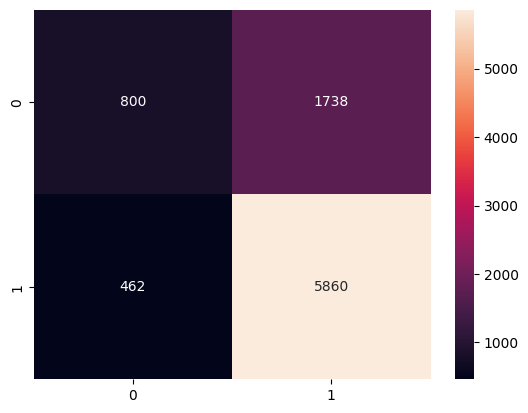

In [56]:
# xgb 모델 선언
xgb_wrapper = XGBClassifier(
                            n_estimators=300,
                            max_depth=int(best['max_depth']),
                            learning_rate=best['learning_rate'],
                            subsample=best['subsample'],
                            colsample_bytree=best['colsample_bytree'],
                            min_split_loss=best['min_split_loss'],
)

evals = [(X_train, y_train), (X_val, y_val)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=15, eval_metric='auc', eval_set=evals, verbose=1)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

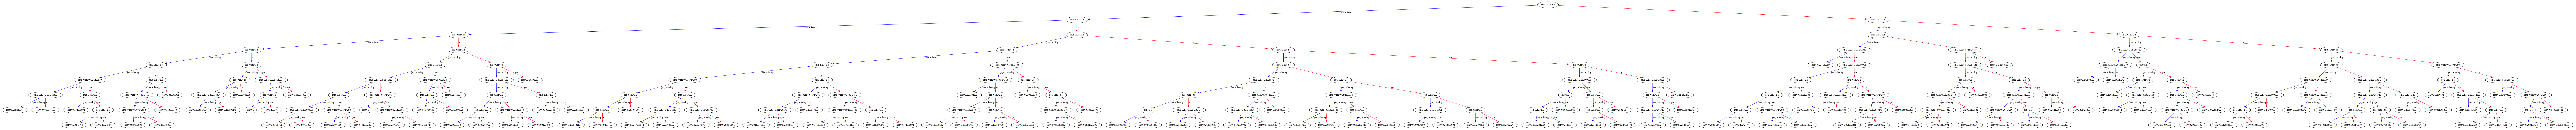

In [57]:
# 의사 결정 트리 시각화

%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 300, 500

plot_tree(xgb_wrapper, max_depth=0)
plt.show()

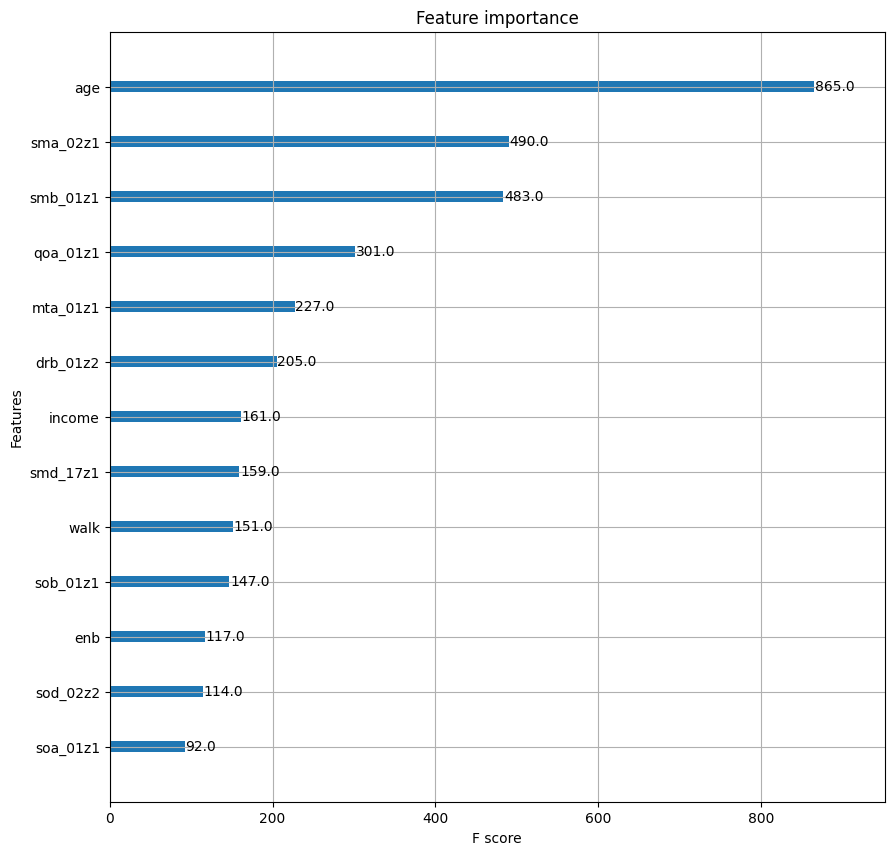

KeyboardInterrupt: ignored

In [ ]:
# feature 중요도 시각화

from xgboost import plot_importance

plot_importance(xgb_wrapper)
plt.figure(figsize=(200, 500))
plt.yticks(fontsize=10)
plt.show()

In [ ]:
!pip install pdpbox
from pdpbox import pdp, info_plots

# 예측 plot
predict_age = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    feature='age',
    feature_name="현재 나이",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_age.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

obtain pred_func from the provided model.


In [ ]:
# 실제 plot
target_age = info_plots.TargetPlot(
    df=X,
    feature="age",
    feature_name="현재 나이",
    target=y
)

fig, axes, summary_df = target_age.plot(
    figsize=(1000,600),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

TypeError: ignored

In [ ]:
# 예측 plot
predict_smk_age = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=x_train,
    model_features=x_train.columns,
    feature=0,
    feature_name="최초 흡연 나이",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_smk_age.plot(
    figsize=(1000,1500),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# target plot
target_smk_age = info_plots.TargetPlot(
    df=df_won,
    feature="sma_02z1",
    feature_name="최초 흡연 나이",
    target=df_won.columns[0]
)

fig, axes, summary_df = target_smk_age.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig


In [ ]:
# feature간 관계 표시
target_cigperday_drink = info_plots.InteractTargetPlot(
    df=df_won,
    features=["smb_01z1", "drb_01z2"],
    feature_names=["하루 흡연량", "음주 빈도"],
    target=df_won.columns[0],
    num_grid_points=50,
    grid_types="percentile",
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
)
fig, axes, summary_df = target_cigperday_drink.plot(
    show_percentile=True,
    figsize=(1000, 600),
    annotate=True,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# 등고선 형태
pdp_smkage_cigperday = pdp.PDPInteract(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    features=["sma_02z1", "smb_01z1"],
    feature_names=["최초 흡연 나이", "하루 흡연량"],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None
)

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/6 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/48 [00:00<?, ?it/s]

In [ ]:
fig, axes = pdp_smkage_cigperday.plot(
    plot_type='contour',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# 2차원 그래프 격자 형태
pdp_cigperday_stress = pdp.PDPInteract(
    model=xgb_wrapper,
    df=x_train,
    model_features=x_train.columns,
    features=[1, 4],
    feature_names=["하루 흡연량", "주관적 스트레스 수치"],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
)

obtain pred_func from the provided model.


  0%|          | 0/6 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/4 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
fig, axes = pdp_cigperday_stress.plot(
    plot_type="grid",
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# ligthgbm model 구축 시작
from lightgbm import early_stopping

    # 하이퍼 파라미터 튜닝

        # 검색 공간 설정 (정수 파라미터들은 추후 정수형변환 필요)
lgbm_search_space = {
                    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
                    'max_depth':  hp.quniform('max_depth', 3, 10, 1),
                    'num_leaves':  hp.quniform('num_leaves', 8, 600, 4),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0)
}

        # 목적 함수
def objective_func(search_space):
    params = {
        'boosting_type': search_space['boosting_type'],
        'num_leaves': int(search_space['num_leaves']),
        'max_depth': int(search_space['max_depth']),
        'colsample_bytree': search_space['colsample_bytree'],
    }

    lgbm_clf = LGBMClassifier(
                            objetive = 'binary',
                            metric ='auc',
                            n_estimators=200,
                            **params,
                            callbacks=[early_stopping(stopping_rounds=5)],
                            random_state=42
    )

    scores = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3)

    return {'loss':np.mean(scores) * 100, 'status': STATUS_OK}


        # fmin
trial_val = Trials()
best = fmin(
            fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=10,
            trials= trial_val,
            rstate=np.random.default_rng(seed=9)
)

print('best hyper parameters:', best)

[LightGBM] [Warning] Unknown parameter: callbacks
[LightGBM] [Warning] Unknown parameter: 0x7d4220859b10>
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: object
[LightGBM] [Warning] Unknown parameter: objetive
[LightGBM] [Warning] Unknown parameter: callbacks
[LightGBM] [Warning] Unknown parameter: 0x7d4220859cc0>
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: object
[LightGBM] [Warning] Unknown parameter: objetive
[LightGBM] [Info] Number of positive: 13450, number of negative: 5449
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 18899, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.711678 -> initscore=0.903547
[Light

[LightGBM] [Info] Number of positive: 20175, number of negative: 8174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 28349, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.711665 -> initscore=0.903486
[LightGBM] [Info] Start training from score 0.903486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

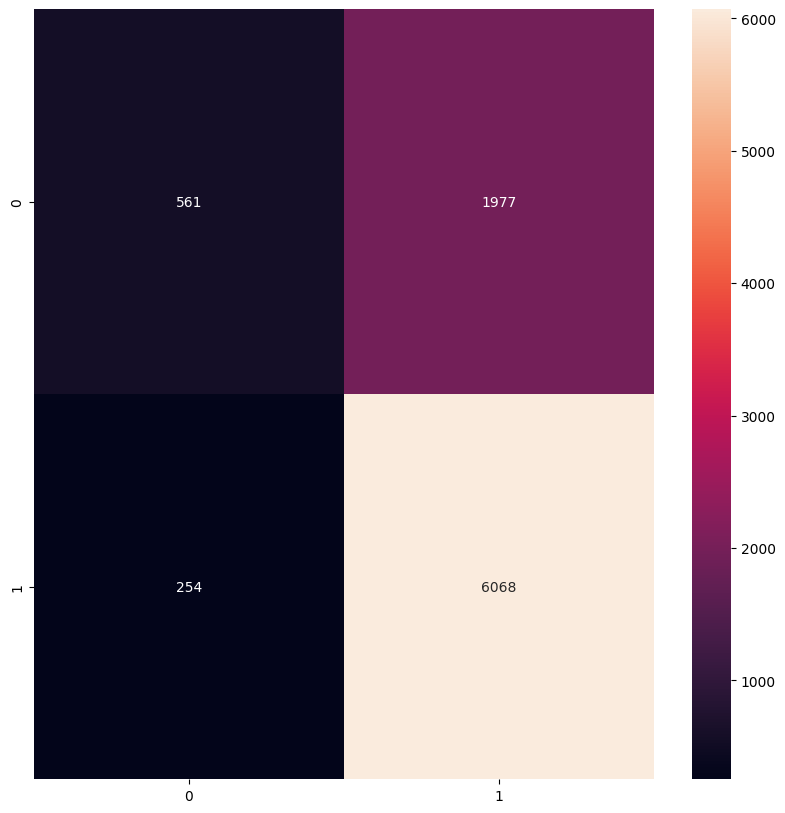

In [ ]:
from lightgbm import early_stopping

lgbm_wrapper = LGBMClassifier(
                              boosting_type='gbdt',
                              n_estimators=200,
                              max_depth=int(best['max_depth']),
                              num_leaves=int(best['num_leaves']),
                              colsample_bytree=best['colsample_bytree'],
                              random_state=42
)
evals = [(X_train, y_train), (X_val, y_val)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='auc', eval_set=evals, callbacks=[early_stopping(stopping_rounds=5)])

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

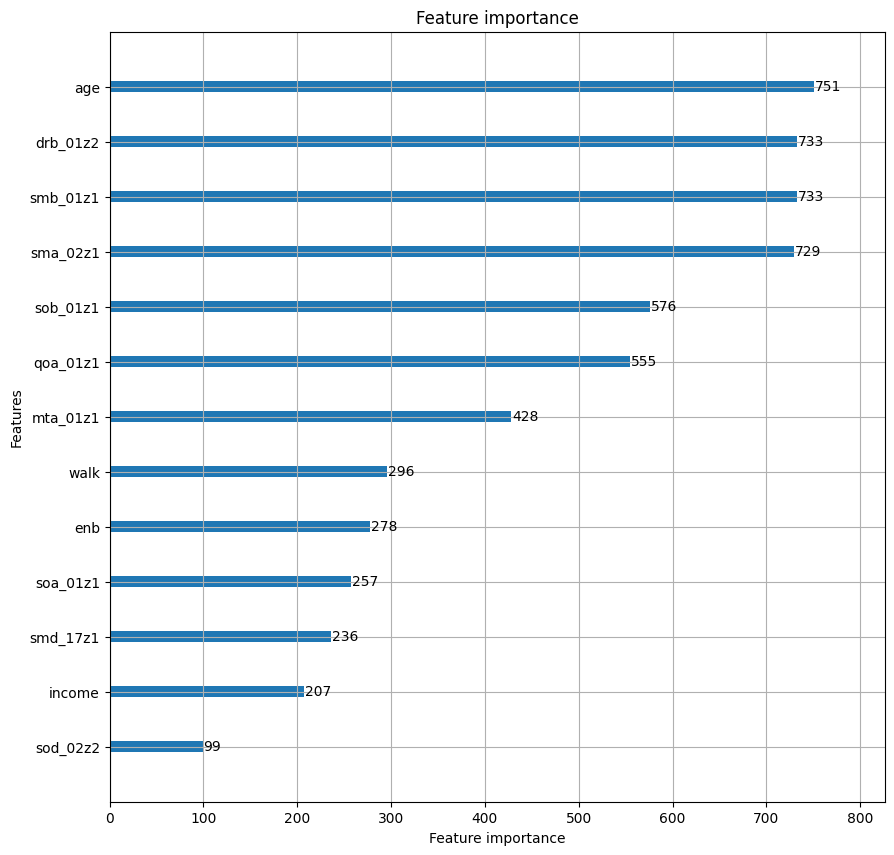

In [ ]:
from lightgbm import plot_importance

plot_importance(lgbm_wrapper)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
lgbm_wrapper = LGBMClassifier(
                              boosting_type='gbdt',
                              n_estimators=200,
                              max_depth=8
                              random_state=42
)
evals = [(X_train, y_train), (X_val, y_val)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='auc', eval_set=evals, callbacks=[early_stopping(stopping_rounds=5)])

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)
